In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
import random
from scipy import stats
import math

input_file = open('/Users/carl/Dropbox/Docs/Python/PyCharm/TRIED_TP2/ordi.txt')
# read in lines into a list of lists, skipping every other line as these are blank
input_data = []
for line in input_file:
    input_data.append(line.split())
    input_file.readline()
# print(input_data)


# extract variable data from columns
X = [row[0] for row in input_data]
X = np.array(X).astype(np.int)
print(X)
Y = [row[1] for row in input_data]
Y = np.array(Y).astype(np.int)
print(Y)

[ 1  2  3  4  4  5  6  6  7  8  9  9 10 10]
[ 23  29  49  64  74  87  96  97 109 119 149 145 154 166]


6.0
97.2142857143
8.14285714286
1983.45408163
[[    8.76923077   136.        ]
 [  136.          2136.02747253]]
16.701754386
-2.9962406015


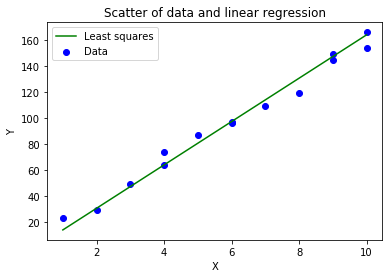

In [78]:
x_bar = np.mean(X)
print(x_bar)
y_bar = np.mean(Y)
print(y_bar)
x_var = np.var(X)
print(x_var)
y_var = np.var(Y)
print(y_var)
# print(np.shape(X))
# print(np.shape(Y))
xy_covar = np.cov(X, Y)
print(xy_covar)

# a = xy_covar[0, 1] / x_var
a = xy_covar[0, 1] / x_var
print(a)
b = y_bar - (a * x_bar)
print(b)

# create new figure
plt.figure()
plt.scatter(X, Y, color='b', label='Data')
plt.title('Scatter of data and linear regression')
plt.ylabel('Y')
plt.xlabel('X')
Y_linreg = (a * X) + b
plt.plot(X, Y_linreg, color='g', label='Least squares')
plt.legend()
plt.show()

In [79]:
# Calculate RMS (root of average squared difference of Y from Y_linreg)
print(Y)
print(Y_linreg)
diff = Y_linreg - Y
print(diff)
power = np.square(diff)
print(power)
sum = np.sum(power)
print(sum)
mean = sum / np.size(Y)
print(mean)
RMS = np.sqrt(mean)
print(RMS)

[ 23  29  49  64  74  87  96  97 109 119 149 145 154 166]
[  13.70551378   30.40726817   47.10902256   63.81077694   63.81077694
   80.51253133   97.21428571   97.21428571  113.9160401   130.61779449
  147.31954887  147.31954887  164.02130326  164.02130326]
[ -9.29448622   1.40726817  -1.89097744  -0.18922306 -10.18922306
  -6.48746867   1.21428571   0.21428571   4.9160401   11.61779449
  -1.68045113   2.31954887  10.02130326  -1.97869674]
[  8.63874740e+01   1.98040370e+00   3.57579569e+00   3.58053655e-02
   1.03820267e+02   4.20872498e+01   1.47448980e+00   4.59183673e-02
   2.41674503e+01   1.34973149e+02   2.82391599e+00   5.38030697e+00
   1.00426519e+02   3.91524080e+00]
511.093984962
36.5067132116
6.0420785506


In [80]:
# Calculate R^2 - should be between 0 and 1 (as R is between -1 and 1
# xy_covar_val = xy_covar[0, 1]
# print(xy_covar_val)
# prod = x_var * y_var
# print(prod)
# R = xy_covar_val / prod
# print(R)
# R2 = np.square(R)
# print(R2)
corr = np.corrcoef(X,Y)
print(corr[0, 1])

0.993698746131


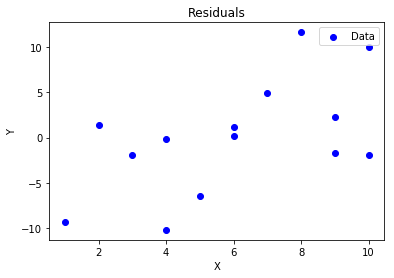

In [81]:
# print residuals graph to see if there's any correlation in the error
# create new figure
plt.figure()
plt.scatter(X, diff, color='b', label='Data')
plt.title('Residuals')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()


In [84]:
import triedtools
# error using student's 
print(stats.t.ppf(1-0.025, 999))

b0, b1, s, R2, sigb0, sigb1 = triedtools.linreg(X, Y)
print(b0, b1, s, R2, sigb0, sigb1)

# interval for b1: +/- (t value from table)*(stddev of b1). do the same for b0
# use t value for 14 data points at 0.95 confidence = 2.1448
b1_interval = 2.1448 * sigb1
b0_interval = 2.1448 * sigb0
# this is the error in the model
print(b1_interval)
print(b0_interval)


1.96234146113
4.16165413534 15.5087719298 5.39172491669 0.987437198062 3.35510039879 0.504981305693
1.08308390445
7.19601933532


In [94]:
# we must predict y when x=7
# this means using y = b1*x + b0
y_ave = (b1 * 7) + b0
print(y_ave)

# variance of y_ave
s_var = np.square(s)
numerator = np.square(7 - np.mean(X))
denominator = np.sum(np.power(X - np.mean(X), 2))
# diff = X - np.mean(X)
# print(diff)
# sq = np.square(diff)
# denominator = np.sum(sq)
brackets = 1 + (1/np.size(X)) + (numerator / denominator)
y_ave_var = np.sqrt(s_var * brackets)
print('y mean = ' + str(y_ave))
print('y max = ' + str(y_ave + y_ave_var))
print('y min = ' + str(y_ave - y_ave_var))

112.723057644
y mean = 112.723057644
y max = 118.326822637
y min = 107.119292651
